In [16]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size for ResNet50V2
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Preprocessing (rescaling)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Path to the merged folders
data_dir = r"C:\Users\VINH\Desktop\SHAKYSHAKY\DATA\merged"

# Load train and validation data
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(data_dir, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # healthy vs parkinson
)

val_generator = val_datagen.flow_from_directory(
    directory=os.path.join(data_dir, "val"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 514 images belonging to 2 classes.


Found 222 images belonging to 2 classes.


In [17]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load base model
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model for transfer learning

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,827,201 (90.89 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [18]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=56
)


c:\Users\VINH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/56
17/17 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.4764 - loss: 0.8902 - val_accuracy: 0.8018 - val_loss: 0.5310
Epoch 2/56
17/17 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8057 - loss: 0.5608 - val_accuracy: 0.8018 - val_loss: 0.5117
Epoch 3/56
17/17 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7691 - loss: 0.5977 - val_accuracy: 0.8018 - val_loss: 0.4806
Epoch 4/56
17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7680 - loss: 0.5552 - val_accuracy: 0.8018 - val_loss: 0.4697
Epoch 5/56
17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7416 - loss: 0.5413 - val_accuracy: 0.8018 - val_loss: 0.4596
Epoch 6/56
17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7965 - loss: 0.5131 - val_accuracy: 0.8018 - val_loss: 0.4576
Epoch 7/56
17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8085 - loss: 0.4923 - val_accuracy: 0.8018 - val_loss: 0.4431
Epoch 8/56
17/17 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7839 - loss: 0.4631 - val_accuracy: 0.8018 - val_loss:

In [19]:
# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(data_dir, "val"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Important for correct label order in predictions
)


Found 222 images belonging to 2 classes.


In [20]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7975 - loss: 0.4555
✅ Test Accuracy: 0.8739
✅ Test Loss: 0.3329


In [21]:
import numpy as np

# Get prediction probabilities
probs = model.predict(test_generator)

# Convert to class labels (0 or 1)
predicted_classes = (probs > 0.5).astype(int).flatten()

# Get true labels
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())


7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


              precision    recall  f1-score   support

     healthy       0.75      0.55      0.63        44
   parkinson       0.89      0.96      0.92       178

    accuracy                           0.87       222
   macro avg       0.82      0.75      0.78       222
weighted avg       0.87      0.87      0.87       222



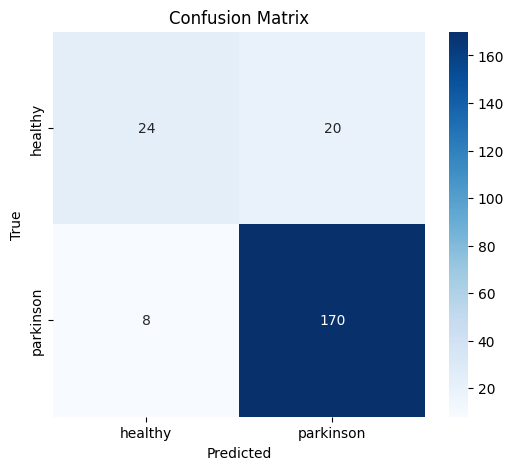

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [23]:
# Show top 5 predictions with highest confidence
for i in range(5):
    print(f"Image {i + 1}:")
    print(f"  ➤ Predicted: {class_labels[predicted_classes[i]]}")
    print(f"  ➤ Confidence: {probs[i][0]:.4f}")
    print(f"  ➤ True: {class_labels[true_classes[i]]}\n")


Image 1:
  ➤ Predicted: healthy
  ➤ Confidence: 0.4384
  ➤ True: healthy

Image 2:
  ➤ Predicted: healthy
  ➤ Confidence: 0.4926
  ➤ True: healthy

Image 3:
  ➤ Predicted: parkinson
  ➤ Confidence: 0.5211
  ➤ True: healthy

Image 4:
  ➤ Predicted: healthy
  ➤ Confidence: 0.3959
  ➤ True: healthy

Image 5:
  ➤ Predicted: healthy
  ➤ Confidence: 0.4243
  ➤ True: healthy



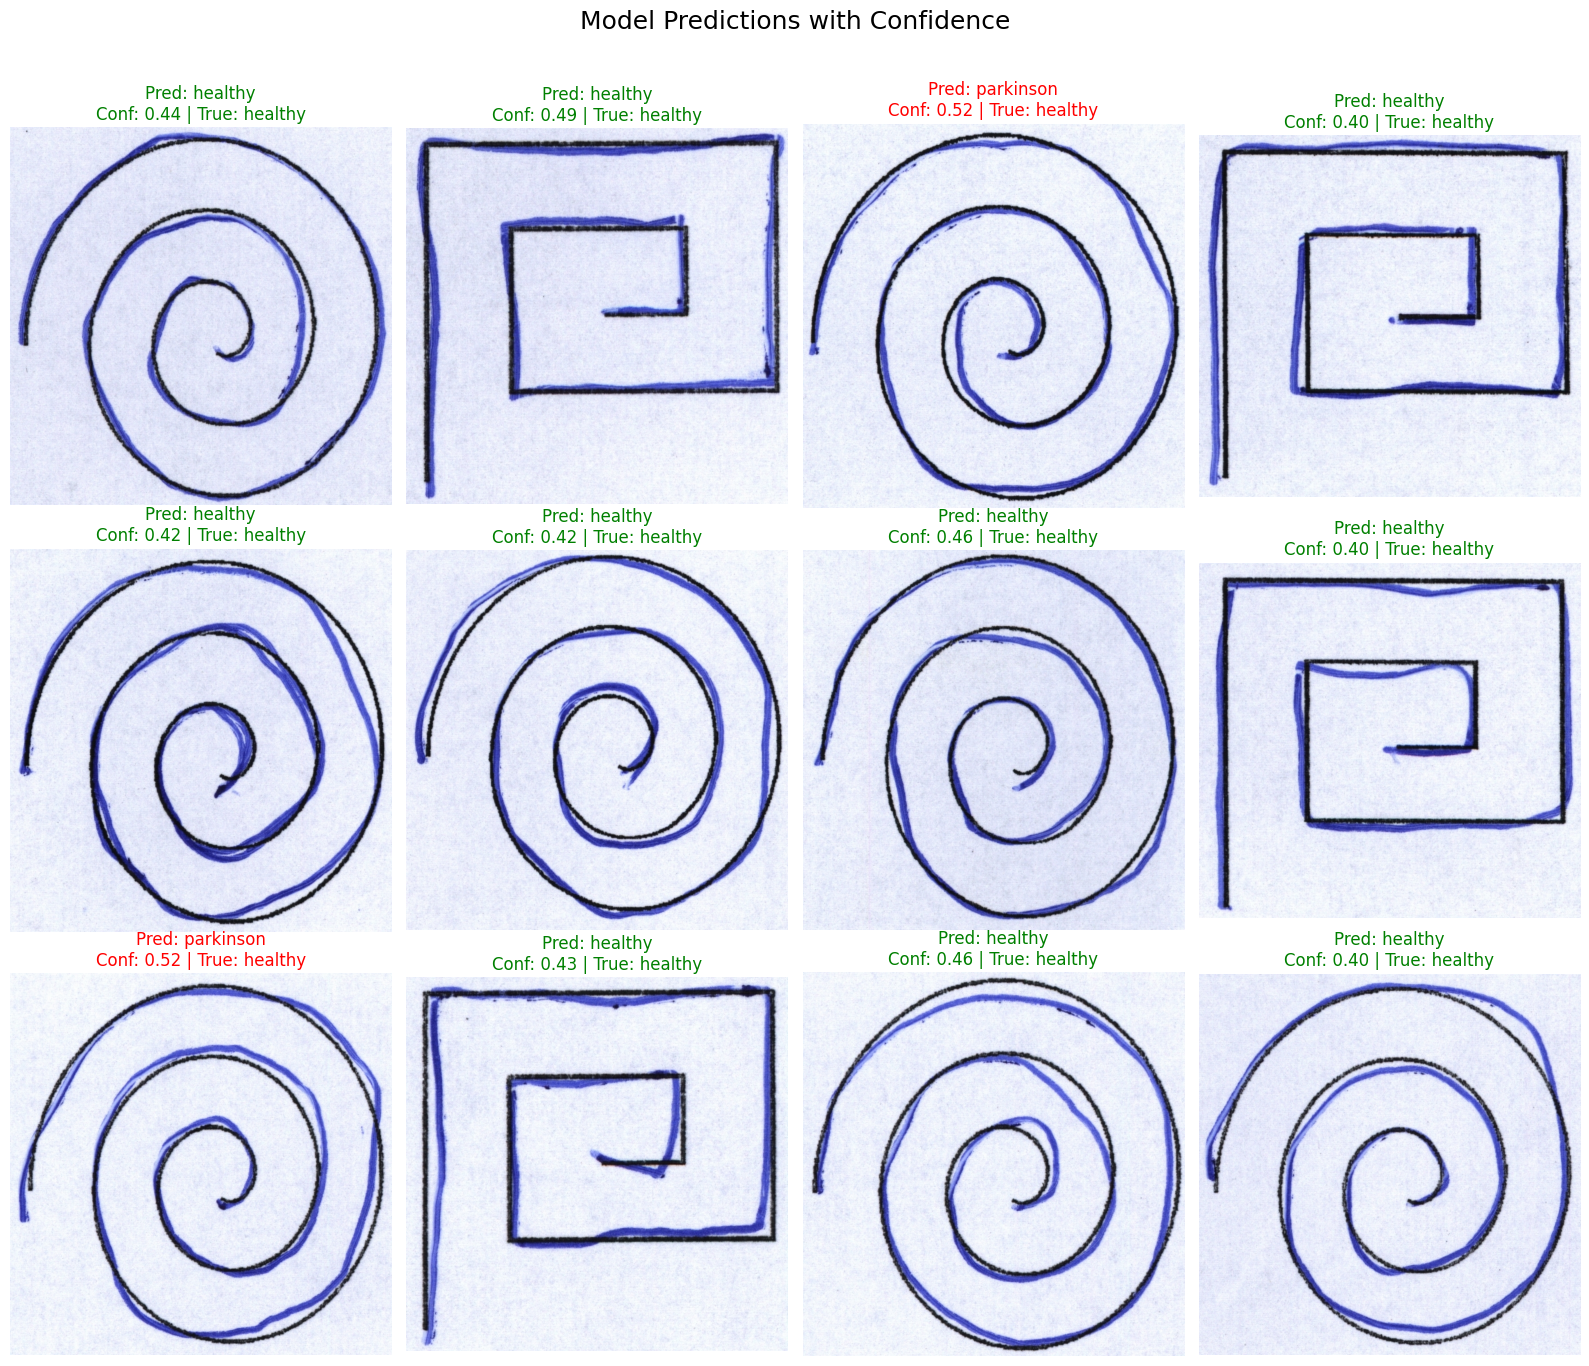

In [24]:
import matplotlib.pyplot as plt

# Get image file paths
filenames = test_generator.filenames

# Get a batch size's worth of image data (adjust num_images as needed)
num_images = 12
plt.figure(figsize=(16, 13))

for i in range(num_images):
    img_path = os.path.join(test_generator.directory, filenames[i])
    
    # Load image to display
    img = plt.imread(img_path)

    # Confidence and predicted class
    confidence = probs[i][0]
    pred_class = class_labels[predicted_classes[i]]
    true_class = class_labels[true_classes[i]]

    # Plot image
    plt.subplot(3, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {pred_class}\nConf: {confidence:.2f} | True: {true_class}",
              color='green' if pred_class == true_class else 'red')

plt.tight_layout()
plt.suptitle("Model Predictions with Confidence", fontsize=18, y=1.05)
plt.show()

